In [21]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

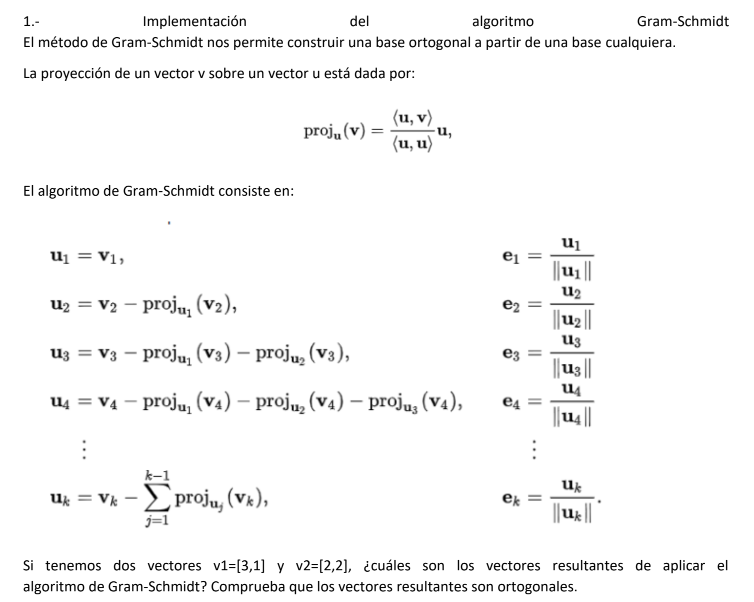

In [23]:
def proy(prev_u, v):
    return (np.dot(prev_u, v) / np.dot(prev_u, prev_u)) * prev_u

def gram_schmidt_general(vectors):
    vectors = [np.array(v, dtype=float) for v in vectors]
    ortho = []

    for v in vectors:
        u = v.copy()
        for prev_u in ortho:
            proj = proy(prev_u, v)
            u -= proj
        ortho.append(u)

    return ortho

V = [[3, 1], [2, 2]]
U = gram_schmidt_general(V)

for i, u in enumerate(U):
    print(f"u{i+1} =", u)

producto_punto = np.dot(U[0], U[1])

print("Producto punto =", producto_punto)

u1 = [3. 1.]
u2 = [-0.4  1.2]
Producto punto = -1.1102230246251565e-15


2. Suponiendo que contamos con los siguiente YTM de bonos (tasa fija, freq pago cupón semestral), obtén los
factores de descuento y las tasas cero en composición continua que resultan del bootstrapping.

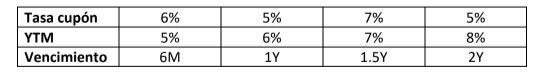

In [3]:

'''
YTM es una tasa promedio (Es la tasa constante que iguala el precio de un bono con el valor presente de todos sus flujos a futuro).
Otra definición: El YTM es la tasa única que iguala el precio actual de un bono con el valor presente de todos sus pagos futuros.
Un factor de descuento D(T) responde la pregunta: ¿Cuánto vale hoy $1 que recibiré en el tiempo T?


'''

'''
Sí conozco los factores de descuento de los flujos tempranos, puedo despejar el factor de descuento del último flujo

'''


def bootstrap_zero_curve(coupons, ytms, maturities, freq=2, face=100):
    """
    coupons     : lista de cupones anuales (ej. 0.06)
    ytms        : lista de YTM anuales (ej. 0.05)
    maturities  : lista de vencimientos en años (ej. 1.5)
    freq        : frecuencia de cupón (default 2)
    face        : valor nominal
    """

    # ordenar por vencimiento
    data = sorted(zip(maturities, coupons, ytms)) #Ordenamos por vencimiento
    
    discount_factors = {}
    zero_rates_cc = {}

    for T, c, y in data:
        n = int(T * freq)
        coupon = c * face / freq
        ytm = y / freq

        # precio usando YTM
        price = 0
        for t in range(1, n + 1):
            cf = coupon if t < n else coupon + face
            price += cf / (1 + ytm) ** t

        # bootstrapping
        known_cf = 0
        for t in range(1, n):
            ti = t / freq
            known_cf += coupon * discount_factors[ti]

        D_T = (price - known_cf) / (coupon + face)
        discount_factors[T] = D_T

        # tasa cero continua
        zero_rates_cc[T] = -np.log(D_T) / T

    return discount_factors, zero_rates_cc


coupons = [0.06, 0.05, 0.07, 0.05]
ytms = [0.05, 0.06, 0.07, 0.08]
maturities = [0.5, 1.0, 1.5, 2.0]

dfs, zeros = bootstrap_zero_curve(coupons, ytms, maturities)

for T in dfs:
    print(f"T={T}  D(T)={dfs[T]:.5f}  r_cc={zeros[T]*100:.2f}%")


T=0.5  D(T)=0.97561  r_cc=4.94%
T=1.0  D(T)=0.94248  r_cc=5.92%
T=1.5  D(T)=0.90132  r_cc=6.93%
T=2.0  D(T)=0.85372  r_cc=7.91%


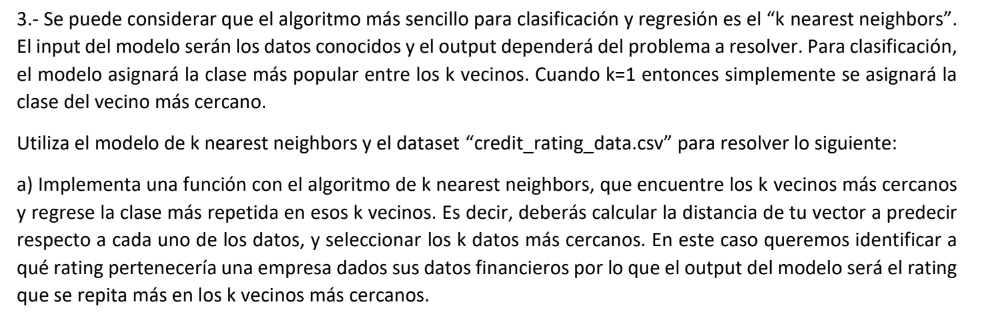

In [8]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))


def knn_predict(x, y, xc, k):
    d = []

    for i in range(len(x)):
        d.append(euclidean_distance(xc, x[i]))

    vecinos = np.argsort(d)[:k]
    votos = [y[i] for i in vecinos]

    return Counter(votos).most_common(1)[0][0]


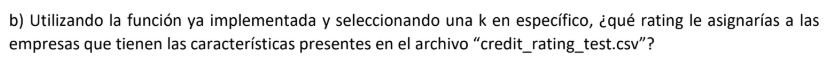

In [20]:
train = pd.read_csv("credit_rating_data.csv")
test = pd.read_csv("credit_rating_test.csv")

# ===============================
# Seleccionar features
# ===============================
features = [
    "Cash",
    "Total debt/total asset",
    "Employees",
    "Revenue - Total",
    "Net Cash Flow"
]

X_train = train[features].values
y_train = train["Rating"].values
X_test = test[features].values

# ===============================
# Escalado
# ===============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===============================
# Predicciones
# ===============================
k = 5
predicciones = []

for x in X_test:
    predicciones.append(knn_predict(X_train, y_train, x, k))

# ===============================
# Resultados
# ===============================
test["rating_asignado"] = predicciones
print(test)

         Cash  Total debt/total asset  Employees  Revenue - Total  \
0      32.982                0.237078      1.211          141.360   
1     127.176                0.399052     97.000         4252.312   
2     234.422                0.216188      2.050          587.635   
3      39.210                0.567672      2.600          458.550   
4       0.024                0.730980      0.245          418.064   
..        ...                     ...        ...              ...   
97     83.355                0.500240      2.864          687.969   
98   3961.400                0.162138      7.400        14237.100   
99     73.534                0.368242      1.734         1265.364   
100  5017.000                0.329264     62.828        23669.000   
101   312.400                0.629883      9.400         2238.000   

     Net Cash Flow   rating_asignado  
0          -30.355  Investment Grade  
1         -317.397       Speculative  
2          150.937  Investment Grade  
3           96.

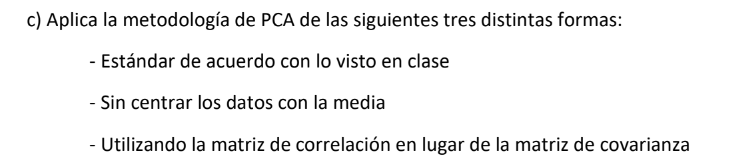

In [ ]:
# ===============================
# Cargar datos
# ===============================
train = pd.read_csv("credit_rating_data.csv")

# ===============================
# Seleccionar features
# ===============================
features = [
    "Cash",
    "Total debt/total asset",
    "Employees",
    "Revenue - Total",
    "Net Cash Flow"
]

X = train[features].values

# ===============================
# 1) PCA estándar (centrado y escalado)
# ===============================
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca_std = PCA()
X_pca_std = pca_std.fit_transform(X_std)

print("Varianza explicada PCA estándar:")
print(pca_std.explained_variance_ratio_)

# ===============================
# 2) PCA sin centrar los datos
# ===============================
pca_no_center = PCA()
X_pca_no_center = pca_no_center.fit_transform(X)

print("\nVarianza explicada PCA sin centrar:")
print(pca_no_center.explained_variance_ratio_)

# ===============================
# 3) PCA usando matriz de correlación
# ===============================
# Matriz de correlación
R = np.corrcoef(X, rowvar=False)

# Autovalores y autovectores
eigvals, eigvecs = np.linalg.eig(R)

# Ordenar de mayor a menor
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Proyección de los datos
X_pca_corr = X @ eigvecs

print("\nVarianza explicada PCA con correlación:")
print(eigvals / np.sum(eigvals))

Varianza explicada PCA estándar:
[0.43417174 0.18942338 0.16679662 0.14981198 0.05979628]

Varianza explicada PCA sin centrar:
[9.10782564e-01 4.73631483e-02 4.18520854e-02 2.20241384e-06
 7.82257537e-11]

Varianza explicada PCA con correlación:
[0.43417174 0.18942338 0.16679662 0.14981198 0.05979628]
